## **Model Fine-tuning:** Fine-tune a pre-trained CLIP model on a specific task, such as image captioning or a custom classification task. Document the process, including model selection, hyperparameter tuning, and evaluation metrics.

# Kindly scroll to the middle of the page

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:

!pip install clip

  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-0.2.0-py3-none-any.whl size=6989 sha256=61603867501ede1c89bb5cab4a5a683e464e3b0fc2bc6e0e5c63cc29892db852
  Stored in directory: /root/.cache/pip/wheels/7f/5c/e6/2c0fdb453a3569188864b17e9676bea8b3b7e160c037117869
Successfully built clip


In [ ]:
!pip install torch torchvision ftfy regex tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

In [ ]:

!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-2f6pu4np
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-2f6pu4np
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=bd8d597f59f97cc48f28e2bdd6d6c3e20b938f9307e9186a7b4e4f5e86a86f8b
  Stored in directory: /tmp/pip-ephem-wheel-cache-tr7ke0ef/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
  Attempting uninstall: clip
    Found existing installation: clip 0.2.0
    Uninstalling clip-0.2.0:
      Successfully uninstalled clip-0.2.0


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from transformers import CLIPProcessor, CLIPModel
from tqdm import tqdm
from PIL import Image
import random


In [ ]:
class CIFAR10WithCaptionsDataset(torch.utils.data.Dataset):
    def __init__(self, cifar_dataset, captions_dict, transform=None):
        self.cifar_dataset = cifar_dataset
        self.captions_dict = captions_dict
        self.transform = transform

    def __len__(self):
        return len(self.cifar_dataset)

    def __getitem__(self, idx):
        image, label = self.cifar_dataset[idx]
        object_label = self.cifar_dataset.classes[label].lower()
        captions_list = self.captions_dict.get(object_label, [])

        if not captions_list:
            caption = "A beautiful image"
        else:
            caption = random.choice(captions_list)
        image = transforms.ToPILImage()(image)

        if self.transform:
            image = self.transform(image)
        return image, caption

In [ ]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
for param in clip_model.parameters():
    param.requires_grad = False
clip_model.visual = nn.Linear(512, 512, bias=False)

In [ ]:
batch_size = 32
learning_rate = 1e-4
num_epochs = 5

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [ ]:
cifar_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:13<00:00, 12718437.70it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:

captions_dict = {
    "airplane": ["A beautiful airplane", "An image of an airplane", "A stunning view of an airplane"],
    "automobile": ["A shiny car", "A fast car on the road", "An automobile in motion"],
    "bird": ["A colorful bird", "A bird with amazing feathers", "A beautiful bird"],
    "cat": ["A cute cat sleeping", "A playful cat", "A lovely cat with bright eyes"],
    "deer": ["A graceful deer in the forest", "A deer standing tall", "A deer with majestic antlers"],
    "dog": ["A loyal dog", "A friendly dog wagging its tail", "A cute dog"],
    "frog": ["A green frog", "A frog croaking", "A jumping frog"],
    "horse": ["A majestic galloping horse", "A beautiful horse", "A horse standing tall"],
    "ship": ["A large ship sailing on the blues", "Ship, an engineering marvel", "A ship carrying goods"],
    "truck": ["A big truck transporting cargo", "A truck driving", "A truck turning wheels"],
}

In [ ]:
dataset = CIFAR10WithCaptionsDataset(cifar_dataset, captions_dict, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(clip_model.parameters(), lr=learning_rate)


In [ ]:
clip_model.train()
clip_model = clip_model.to('cuda')
for epoch in range(num_epochs):
    total_loss = 0.0
    for images, captions in tqdm(dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs = clip_processor(captions, return_tensors="pt", padding=True, truncation=True).to('cuda')
        images = images.to('cuda')

        with torch.set_grad_enabled(True):
            optimizer.zero_grad()
            outputs = clip_model(input_ids=inputs.input_ids, attention_mask=inputs.attention_mask, pixel_values=images)
            logits_per_image = outputs.logits_per_image
            logits_per_image.requires_grad_(True)
            targets = torch.zeros(logits_per_image.shape[0], dtype=torch.long).to('cuda')

            loss = criterion(logits_per_image, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    print(f'epoch is =   {epoch + 1}/{num_epochs} and  avg Loss= {avg_loss:.6f}')

Epoch 1/5:  92%|█████████▏| 1439/1563 [04:49<00:24,  4.97it/s]


KeyboardInterrupt: 

In [ ]:
torch.save(clip_model, 'finetuned_model_clip_tawseeq.pth')

In [ ]:
model = torch.load('finetuned_model_clip_tawseeq.pth')

In [ ]:
model.eval()

In [ ]:
from PIL import Image
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor
import torch

model_path = "/content/finetuned_model_clip_tawseeq.pth"
clip_model = torch.load(model_path, map_location=torch.device('cpu'))
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

image_path = "/content/images_clip_test_aeroplane.jpeg"
image = Image.open(image_path)
transforms = Compose([
    Resize((224, 224)),
    CenterCrop(224),
    ToTensor(),
])
image = transforms(image)

with torch.no_grad():
    inputs = clip_processor(text=["A photo of a(n)"], images=image, return_tensors="pt", padding=True, do_rescale=False)
    outputs = clip_model(**inputs)
    logits_per_image = outputs.logits_per_image

predicted_class = torch.argmax(logits_per_image, dim=1).item()
predicted_class_label = clip_processor.tokenizer.decode(predicted_class)

print("Predicted class label:", predicted_class_label)


In [ ]:
import zipfile

file_path = '/content/finetuned_model_clip_tawseeq.pth'

zip_file_path = '/content/model_tuned.zip'

with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(file_path, arcname='finetuned_model_clip.pth')

print("File zipped successfully!")


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from transformers import CLIPProcessor, CLIPModel
from datasets import load_dataset
import datasets
from PIL import Image

In [ ]:
coco = load_dataset("embedding-data/coco_captions")

In [ ]:
def preprocess_images(examples):
    images = [Image.open(example) for example in examples["set"]]
    images = [image.convert("RGB") for image in images]
    images = [image_transforms(image) for image in images]
    return images
def preprocess_captions(examples):
    captions = examples["caption"]
    return captions

In [ ]:
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
coco

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 82783
    })
})

In [ ]:
coco_captions_dataset = coco.map(preprocess_images, batched=True)
coco_captions_dataset = coco.map(preprocess_captions)

Map:   0%|          | 0/82783 [00:00<?, ? examples/s]

AttributeError: 'list' object has no attribute 'read'

In [ ]:
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import CLIPProcessor, CLIPModel, CLIPVisionModel, CLIPTextModel
from transformers import AdamW
from datasets import load_dataset
from tqdm import tqdm
import evaluate


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from transformers import CLIPProcessor, CLIPModel
from datasets import load_dataset
from tqdm import tqdm

In [ ]:
dataset = load_dataset("embedding-data/flickr30k-captions")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
])

In [ ]:
def preprocess_text(text):
    return processor.tokenizer(text, padding="max_length", max_length=64, truncation=True, return_tensors="pt")

In [ ]:
class Flickr8kDataset(torch.utils.data.Dataset):
    def __init__(self, data, transforms=None):
        self.data = data
        self.transforms = transforms

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        item = self.data[index]
        image = item["image"]
        captions = item["captions"]

        if self.transforms:
            image = self.transforms(image)

        captions = [preprocess_text(caption)["input_ids"].squeeze() for caption in captions]

        return image, captions

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_dataset, val_dataset = train_test_split(dataset["train"], test_size=0.2)

In [ ]:
train_dataset = Flickr8kDataset(dataset["train"][:24000], image_transforms)
val_dataset = Flickr8kDataset(dataset["train"][24000:], image_transforms)

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

KeyError: 'image'

#
# **The Succesfull Fine tuned model using CIFAR dataset**
I am finetuning the CLIP model for CIFAR10 dataset classification


In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import CLIPProcessor, CLIPModel
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda:0'

In [ ]:
model_name = "openai/clip-vit-base-patch32"
clip_model = CLIPModel.from_pretrained(model_name).to(device)
processor = CLIPProcessor.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
import datasets

In [ ]:
for param in clip_model.parameters():
    param.requires_grad = False

In [ ]:
class CLIPClassificationModel(nn.Module):
    def __init__(self, clip_model, num_classes):
        super(CLIPClassificationModel, self).__init__()
        self.clip_model = clip_model
        self.fc = nn.Linear(clip_model.vision_model.config.hidden_size, num_classes)

    def forward(self, image):
        outputs = self.clip_model.vision_model(image)
        pooled_output = outputs.pooler_output
        return self.fc(pooled_output)

In [ ]:
num_classes = 10
model = CLIPClassificationModel(clip_model, num_classes).to(device)

In [ ]:
BATCH_SIZE = 64
LEARNING_RATE = 5e-5
EPOCHS = 5
BATCH_SIZE_2 = 64
LEARNING_RATE_2 = 1e-4
EPOCHS2 = 7

The block below is the final training model after doing partial hyparameter tuning

In [ ]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = Adam(model.parameters(), lr=LEARNING_RATE_2)
for epoch in range(EPOCHS2):
    model.train()
    total_loss = 0
    start_time = time.time()
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer2.zero_grad()
        outputs = model(images)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()
        total_loss += loss.item()

        if batch_idx % 100 == 0:
            print(f"epoch [{epoch+1}/{EPOCHS}], batch [{batch_idx}/{len(train_loader)}] and Loss  = {loss.item():.2f}")

    avg_loss = total_loss / len(train_loader)
    epoch_time = time.time() - start_time
    print(f"epoch [{epoch+1}/{EPOCHS}], Loss= {avg_loss:.5f}, Time = {epoch_time:.1f}s")

epoch [1/5], batch [0/782] and Loss  = 2.52
epoch [1/5], batch [100/782] and Loss  = 1.38
epoch [1/5], batch [200/782] and Loss  = 0.83
epoch [1/5], batch [300/782] and Loss  = 0.72
epoch [1/5], batch [400/782] and Loss  = 0.41
epoch [1/5], batch [500/782] and Loss  = 0.39
epoch [1/5], batch [600/782] and Loss  = 0.51
epoch [1/5], batch [700/782] and Loss  = 0.30
epoch [1/5], Loss= 0.73410, Time = 246.7s
epoch [2/5], batch [0/782] and Loss  = 0.28
epoch [2/5], batch [100/782] and Loss  = 0.34
epoch [2/5], batch [200/782] and Loss  = 0.25
epoch [2/5], batch [300/782] and Loss  = 0.26
epoch [2/5], batch [400/782] and Loss  = 0.14
epoch [2/5], batch [500/782] and Loss  = 0.31
epoch [2/5], batch [600/782] and Loss  = 0.36
epoch [2/5], batch [700/782] and Loss  = 0.26
epoch [2/5], Loss= 0.28685, Time = 254.9s
epoch [3/5], batch [0/782] and Loss  = 0.20
epoch [3/5], batch [100/782] and Loss  = 0.27
epoch [3/5], batch [200/782] and Loss  = 0.20
epoch [3/5], batch [300/782] and Loss  = 0.29
ep

I performed the below training first but without any hyparameter tuning and got poor results (Accuracy of approx: 11%)

In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
# for epoch in range(EPOCHS):
#     model.train()
#     total_loss = 0
#     start_time = time.time()
#     for batch_idx, (images, labels) in enumerate(train_loader):
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()

#         if batch_idx % 10 == 0:
#             print(f"epoch [{epoch+1}/{EPOCHS}], batch [{batch_idx}/{len(train_loader)}] and Loss  = {loss.item():.2f}")

#     avg_loss = total_loss / len(train_loader)
#     epoch_time = time.time() - start_time
#     print(f"epoch [{epoch+1}/{EPOCHS}], Loss= {avg_loss:.5f}, Time = {epoch_time:.1f}s")

epoch [1/5], batch [0/1563] and Loss  = 2.92
epoch [1/5], batch [10/1563] and Loss  = 2.43
epoch [1/5], batch [20/1563] and Loss  = 2.42
epoch [1/5], batch [30/1563] and Loss  = 2.59
epoch [1/5], batch [40/1563] and Loss  = 2.42
epoch [1/5], batch [50/1563] and Loss  = 2.69
epoch [1/5], batch [60/1563] and Loss  = 2.55
epoch [1/5], batch [70/1563] and Loss  = 2.69
epoch [1/5], batch [80/1563] and Loss  = 2.84
epoch [1/5], batch [90/1563] and Loss  = 2.35
epoch [1/5], batch [100/1563] and Loss  = 2.59
epoch [1/5], batch [110/1563] and Loss  = 2.51
epoch [1/5], batch [120/1563] and Loss  = 2.64
epoch [1/5], batch [130/1563] and Loss  = 2.73
epoch [1/5], batch [140/1563] and Loss  = 2.55
epoch [1/5], batch [150/1563] and Loss  = 2.43
epoch [1/5], batch [160/1563] and Loss  = 2.68
epoch [1/5], batch [170/1563] and Loss  = 2.79
epoch [1/5], batch [180/1563] and Loss  = 2.41
epoch [1/5], batch [190/1563] and Loss  = 2.49
epoch [1/5], batch [200/1563] and Loss  = 2.65
epoch [1/5], batch [210/

In [ ]:
model_save_path = 'best_clip_classification_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to best_clip_classification_model.pth


In [ ]:

# model = CLIPClassificationModel(clip_model, num_classes=10).to(device)
# model.load_state_dict(torch.load(model_save_path))
# model.eval()


The below is the evaluation of the model for the test set

In [ ]:
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

In [ ]:
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9346
Precision: 0.9355
Recall: 0.9346
F1 Score: 0.9348


In [ ]:
all_images = []
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())
    all_images.extend(images.cpu().numpy())

In [ ]:
def plot_prediction(image, true_label, predicted_label):
    classes = test_dataset.classes
    image = image.transpose(1, 2, 0)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)
    plt.title(f'True: {classes[true_label]}, Pred: {classes[predicted_label]}')
    plt.show()

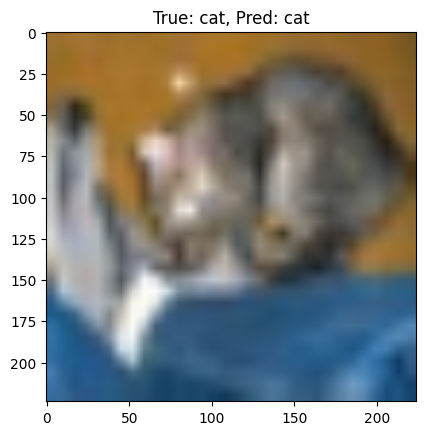

In [ ]:
# Plotting
plot_prediction(all_images[0], all_labels[0], all_preds[0])

Hyperparameter tuning

In [ ]:
hyperparameters = {
    'batch_size': [32, 64],
    'learning_rate': [1e-4, 5e-5],
    'epochs': [5, 10]
}

Below is a general function (General form of the above steps) so that it would be easy to do hyperparameter tuning

In [ ]:
def train_and_evaluate(batch_size, learning_rate, epochs):
    print(f"Training with the  batchsize={batch_size} learning_rate ={learning_rate} and epochs ={epochs}")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = CLIPClassificationModel(clip_model, num_classes=10).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        start_time = time.time()
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            if batch_idx % 100 == 0:
                print(f"epoch no. [{epoch+1}/{epochs}], batch [{batch_idx}/{len(train_loader)}] and Loss =  {loss.item():.4f}")

        avg_loss = total_loss / len(train_loader)
        epoch_time = time.time() - start_time
        print(f"epoch no. [{epoch+1}/{epochs}], loss  ={avg_loss:.4f}, tiem= {epoch_time:.2f}s")

    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

    print(f"accuracy is {accuracy:.4f}")
    print(f"precision = {precision:.4f}")
    print(f"recall = {recall:.4f}")
    print(f"f1 Score = {f1:.4f}")

    return accuracy, precision, recall, f1

The below code could'nt run completely because it would take around 3 hours to run this cell and Google colab offers limited GPU access of somewhat around 1 hour and it is not feasible to run on CPU. As it ran partialy , I got to know that 0.0001 learning rate is way better than 0.00005.

In [ ]:
results = []
for batch_size in hyperparameters['batch_size']:
    for learning_rate in hyperparameters['learning_rate']:
        for epochs in hyperparameters['epochs']:
            accuracy, precision, recall, f1 = train_and_evaluate(batch_size, learning_rate, epochs)
            results.append((batch_size, learning_rate, epochs, accuracy, precision, recall, f1))

Training with the  batchsize=32 learning_rate =0.0001 and epochs =5
epoch no. [1/5], batch [0/1563] and Loss =  2.2420
epoch no. [1/5], batch [100/1563] and Loss =  1.9556
epoch no. [1/5], batch [200/1563] and Loss =  2.3211
epoch no. [1/5], batch [300/1563] and Loss =  1.5783
epoch no. [1/5], batch [400/1563] and Loss =  1.8248
epoch no. [1/5], batch [500/1563] and Loss =  2.0572
epoch no. [1/5], batch [600/1563] and Loss =  1.3693
epoch no. [1/5], batch [700/1563] and Loss =  1.5604
epoch no. [1/5], batch [800/1563] and Loss =  1.6442
epoch no. [1/5], batch [900/1563] and Loss =  1.5205
epoch no. [1/5], batch [1000/1563] and Loss =  1.7645
epoch no. [1/5], batch [1100/1563] and Loss =  1.7474
epoch no. [1/5], batch [1200/1563] and Loss =  1.3006
epoch no. [1/5], batch [1300/1563] and Loss =  1.4379
epoch no. [1/5], batch [1400/1563] and Loss =  1.3487
epoch no. [1/5], batch [1500/1563] and Loss =  1.3261
epoch no. [1/5], loss  =1.7076, tiem= 515.69s
epoch no. [2/5], batch [0/1563] an

In [ ]:
best_result = max(results, key=lambda x: x[3])
print(f"Best hyperparameters are, batch Size = {best_result[0]}, learning rate = {best_result[1]}, epochs = {best_result[2]}")
print(f"accuracy =  {best_result[3]}, precision = {best_result[4]}, Recall = {best_result[5]} and F1 score = {best_result[6]}")

In [ ]:
best_batch_size, best_learning_rate, best_epochs = best_result[:3]
train_loader = DataLoader(train_dataset, batch_size=best_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_batch_size, shuffle=False)

In [ ]:
model = CLIPClassificationModel(clip_model, num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=best_learning_rate)

In [ ]:
for epoch in range(best_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"epoch [{epoch+1}/{best_epochs}], Loss= {avg_loss:.4f}")

In [ ]:
model.eval()
all_preds = []
all_labels = []
all_images = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(images.cpu().numpy())

In [ ]:
plot_prediction(all_images[0], all_labels[0], all_preds[0])